# Cell Analysis Worksheet #2

### Emaad Khwaja

## Introduction

In this notebook, we'll be seeing how exactly we go from a cellular image to a neatly organized spreadsheet. Below we have a cell image.


<img src="Data/worksheet_2_mNeonGreen/cell image.jpg" width
    ="400">

This is a 3-channel image, with each channel selecting for a different type of fluorescent protein. Notice how the intensity varies from channel to channel.

<img src="Images/channels.jpg" height="400">

The idea behind segmentation is fairly easy. We draw circles around each individual cell. We count the intensity of the values inside the circle, and we ignore the values outside of it. We do this for each individual cell to generate the full list that shows stats on a per cell level. Below are examples of masks on different types of cell images.

<img src="Images/Masks.jpg" width="1000">

In this notebook, we will analyse a cell image to characterize the population.

## Part I: Importing the Image

1. Import the file labeled 'cell image.jpg' in the Data/mNeonGreen folder. Display the image using matplotlib.

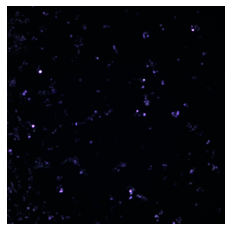

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

cellimg = plt.imread('Data/worksheet_2_mNeonGreen/cell image.jpg')
plt.axis("off")
plt.imshow(cellimg)

2. Display the individual channels of the image. The labels of these should be 'DAPI', 'FITC', and 'Alexa 594'. 

In [2]:
red = cellimg[:, :, 0];
green = cellimg[:, :, 1]; 
blue = cellimg[:, :, 2]; 
cellimg.shape
# allBlack = np.zeros(np.size(cellimg));
# allBlack

# plt.subplot(3, 3, 2);
# plt.imshow(rgbImage);
# fontSize = 20;
# title('Original RGB Image', 'FontSize', fontSize)
# plt.subplot(3, 3, 4);
# plt.imshow(just_red);
# title('Red Channel in Red', 'FontSize', fontSize)
# plt.subplot(3, 3, 5);
# plt.imshow(just_green)
# title('Green Channel in Green', 'FontSize', fontSize)
# plt.subplot(3, 3, 6);
# imshow(just_blue);
# title('Blue Channel in Blue', 'FontSize', fontSize)

(2048, 2048, 3)

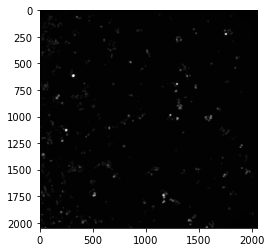

In [3]:
plt.imshow(255 - green,cmap= "Greys")

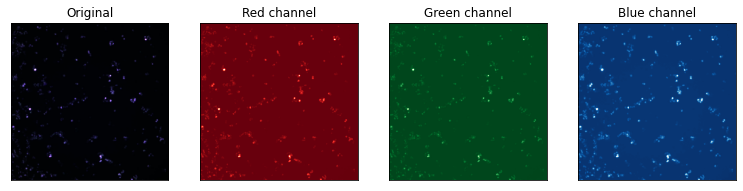

In [4]:
titles = ['Original', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, (cellimg, *cellimg.transpose(2,0,1)), titles, cmaps)

for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.savefig('RGB1.png')


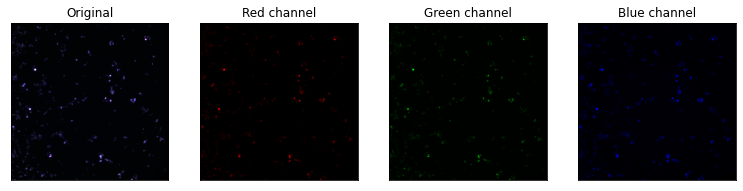

In [5]:
from numpy import array, zeros_like
def channel(cellimg, color):
    if color not in (0, 1, 2): return cellimg
    c = cellimg[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)

colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(cellimg, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.savefig('RGB2.png')

3. Plot histograms of the pixel values for each channel on the same graph. 

In [6]:
np.nan_to_num(np.log(0))

<ipython-input-6-6dcb45cf5474>:1: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num(np.log(0))


-1.7976931348623157e+308

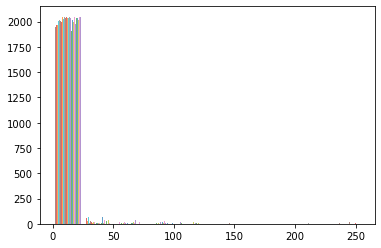

In [7]:
hist_nums = plt.hist(x=red, bins= 10, alpha=0.7, rwidth=0.85)


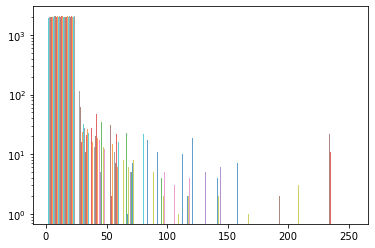

In [8]:
hist_nums = plt.hist(x=red, bins= 10, alpha=0.7, rwidth=0.85, log=True)


4. Compute the total brightness (Use Numpy) for each channel and determine the ratio for the image. i.e. 'DAPI' - 10%, 'FITC' - 40%, 'Alexa 594' - 50%.

In [9]:
mred = np.matrix(red)
mgreen = np.matrix(green)
mblue = np.matrix(blue)

totalred = np.sum(mred)
totalgreen = np.sum(mgreen)
totalblue = np.sum(mblue)

total = totalred+totalgreen+totalblue

DAPIratio = round(np.divide(totalblue, total) * 100)
FITCratio = round(np.divide(totalgreen, total) * 100)
ALEXAratio = round(np.divide(totalred, total) * 100)

print("'DAPI' - " + str(DAPIratio)+ "%,","'FITC' - " + str(FITCratio)+ "%,","'Alexa 594' - " + str(ALEXAratio) + "%.")


#wearepoggers

'DAPI' - 57%, 'FITC' - 24%, 'Alexa 594' - 19%.


5. Print the mean value and standard deviation for each channel. Compare this to the mean and standard deviation of the original image.

In [30]:
print("Original Mean, ", np.mean(cellimg), "| STD Original - ", cellimg.std())

print("Red Mean, ", np.mean(mred), "| STD - Red, ", mred.std())
print("Green Mean, ", np.mean(mgreen), "| STD - Green, ", mgreen.std())
print("Blue Mean, ", np.mean(mblue), "| STD - Blue, ", mblue.std())


Original Mean,  4.5638894240061445 | STD Original -  11.240815243340679
Red Mean,  2.555035352706909 | STD - Red,  9.282198127514175
Green Mean,  3.286696195602417 | STD - Green,  7.305837602374186
Blue Mean,  7.8499367237091064 | STD - Blue,  14.935477654756465


6. Notice how this array is a matrix. This means we can do matrixy things with it. This includes global arithemtic operations. Invert the image by subtracting 255 from each channel. Then combine the channels to display the inverted image. 

matrix([[255, 255, 255, ..., 255, 254, 254],
        [255, 255, 255, ..., 255, 254, 254],
        [255, 255, 255, ..., 255, 254, 254],
        ...,
        [245, 245, 244, ..., 255, 255, 255],
        [245, 244, 244, ..., 255, 255, 255],
        [244, 244, 244, ..., 255, 255, 255]], dtype=uint8)

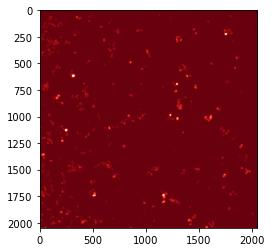

In [46]:
invred = 255 - mred
invredmap = plt.imshow(invred,cmap= "Reds")
invred

matrix([[253, 253, 253, ..., 253, 252, 252],
        [253, 253, 253, ..., 253, 252, 252],
        [253, 253, 253, ..., 253, 252, 252],
        ...,
        [245, 245, 244, ..., 253, 253, 253],
        [245, 244, 244, ..., 253, 253, 253],
        [244, 244, 244, ..., 253, 253, 253]], dtype=uint8)

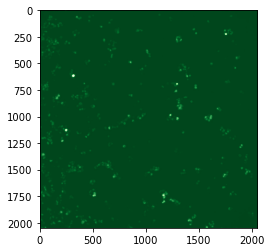

In [47]:
invgreen = 255 - mgreen
invgreenmap = plt.imshow(invgreen,cmap= "Greens")
invgreen

matrix([[254, 254, 254, ..., 254, 253, 253],
        [254, 254, 254, ..., 254, 253, 253],
        [254, 254, 254, ..., 254, 253, 253],
        ...,
        [235, 235, 234, ..., 254, 254, 254],
        [235, 234, 234, ..., 254, 254, 254],
        [234, 234, 234, ..., 254, 254, 254]], dtype=uint8)

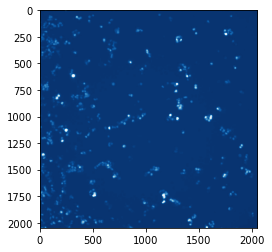

In [48]:
invblue = 255 - mblue
invbluemap = plt.imshow(invblue,cmap= "Blues")
invblue

[[254 254 254 ... 254 253 253]
 [254 254 254 ... 254 253 253]
 [254 254 254 ... 254 253 253]
 ...
 [235 235 234 ... 254 254 254]
 [235 234 234 ... 254 254 254]
 [234 234 234 ... 254 254 254]]


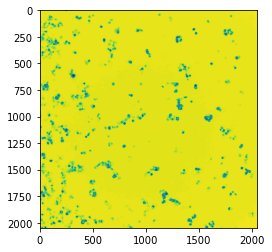

In [60]:
invcomb = (invred+invgreen+invblue)
print(invblue) 
invcomb
plt.imshow(invcomb)

7. Multiply the image by 2 and display. What is the result? Explain why it looks the way it does. 

(*Hint*: Consider the range of values possible for a JPEG image and what happens to a value larger than the possible maximum)

[[244 244 244 ... 244 238 238]
 [244 244 244 ... 244 238 238]
 [244 244 244 ... 244 238 238]
 ...
 [170 170 164 ... 244 244 244]
 [170 164 164 ... 244 244 244]
 [164 164 164 ... 244 244 244]]


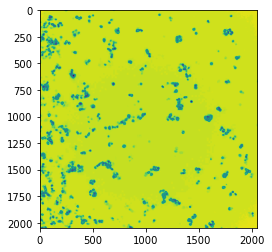

In [70]:
dinvcomb = invcomb + invcomb
print(dinvcomb)
plt.imshow(dinvcomb)

[[500 500 500 ... 500 494 494]
 [500 500 500 ... 500 494 494]
 [500 500 500 ... 500 494 494]
 ...
 [426 426 420 ... 500 500 500]
 [426 420 420 ... 500 500 500]
 [420 420 420 ... 500 500 500]]


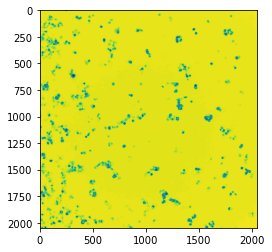

In [71]:
testinvcomb = invcomb * 2
print(testinvcomb)
plt.imshow(testinvcomb)

In [ ]:
#                      ¯\_(ツ)_/¯

## Part II: Masking

The mask file is of the same dimension as the cell image file but contains a single channel. Each pixel corresponds to a particular cell number. In the example below, we have 2 cells, a red and a blue one (left). In the masks image (right) the background pixels are set to 0. Any pixel containing data for the red cell is labeled with a '1' in the mask. Any pixel corresponding to the blue cell are labeled with a '2'.

<img src="Images/mask example.jpg" width="1000">

1. Import the masks file in the data folder. Try to display this file with matplotlib.

Note that this is a TIF file instead of JPEG. Since we are assigning a number corresponding to each individual cell, we dont want to be capped at 2^8 - 1 = 255 since an image can contain thousands of cells. Because TIF is a 16-bit file format, that gives us 2^16 = 65,536 posssible values for each pixel, which is more than enough.

You probably cant see much difference between each cell like in the picture. This is for 2 main reasons:

1) We aren't coming anywhere close to 65,536

2) We increment by 1 each time, meaning when we treat these as colors they are as close as possible.

2. Display using the rainbow color map. This will be only slightly better than before. If you're feeling ambitious, create a custom color map using the 4 color theorem so there is no overlap and apply it to the image.

3. Let's try to analyze a single cell. Using the masks file, create a new array that is True (or 1) where the mask number = 1 and False (or 0) everywhere else. Multiply this dataframe by the original cell image to 0 out any pixels that aren't of interest.

4. Print out the mean and standard deviation of cell 1. Make sure to not consider the pixels outside of the cell area, as those 0s will artifically decrease your mean.

5. Using a for loop, print out the mean and standard deviation (in a single line) for each cell.

## Part III: Summary

1. Convert the image to grayscale and use the mask file for calculation. Create a function to construct a dataframe with the following columns:

a) Mask Number

b) Cell Area

c) Brightness (This will be the sum of the pixel values)

d) Brightness Mean

e) Brightness Standard Deviation

f) Intensity (Brightness/Cell Area)

2. Using the function you created before, repeat this operation but this time on each channel of the original image. You can have 3 separate dataframes for each one.

3. Combine all 3 dataframes into a single dataframe. You will do a join on the mask number. We will need columns c) - f) for each respective channel.

## Part IV: Analysis

1. Create a histogram for the cell sizes.

2. Generate plots for the color channels similar to what was done in the last worksheet. (DAPI vs FITC) etc.

3. Compute the channel ratios of the intensity channels. like you did in Part I 4), but this time on a per-cell level. Average these and to compute an "Average Per Cell Ratio" and compare these against the global ratio from Part I 4). Are the values different? Why?